Feedback welcome! This code was helpful to me in generating examples for https://arxiv.org/abs/2203.03531, so I've decided to make it public. It's certainly not fast, or perfect (see below: "get_Levels" can potentially throw an error), and your feedback on specific improvements is welcome and will be gratefully acknowledged. 

In [ ]:
def get_Levels(E,N):
    div_roots = E.division_polynomial(N).roots(multiplicities = False)
    P = E.lift_x(div_roots[0])
    Q = E.lift_x(div_roots[1])
    Grps = []
    for a in range(N):
        Grps.append(set([b*(a*P + Q) for b in range(N)]))
    Grps.append(set([a*P for a in range(N)]))
    Grps_Dict = {}
    for val in range(len(Grps)):
        Grps_Dict['G'+str(val)] = Grps[val]
    if len(Grps_Dict) != N+1:
        print("PROBLEM: Did not generate all groups") # If this error is thrown, choose a different Q.
    return Grps_Dict

'''
Input: distinct primes p, ell, and N
Output: The directed ell-isogeny graph of supersingular elliptic curves over Fp-bar with level-N structure.
'''
def LS_Graph(p,ell,N):
    Fp2 = GF(p^2)
    Fp12 = Fp2.extension(6)
    ss_js_Es_dict = {}
    for num in Fp2:
        E = EllipticCurve(Fp12,j=num)
        if E.is_supersingular():
            ss_js_Es_dict[num] = E
    group_info = {}
    for ss_j in ss_js_Es_dict.keys():
        Level_Dict = get_Levels(ss_js_Es_dict[ss_j],N)
        group_info[ss_j] = Level_Dict
    Edges = []
    for ss_j in ss_js_Es_dict.keys():
        E = ss_js_Es_dict[ss_j]
        E_Levels = group_info[ss_j]
        isogs_raw = E.isogenies_prime_degree(ell)
        isogs = []
        for isog in isogs_raw:
            isog_codomain_j = Fp2(isog.codomain().j_invariant())
            isog_fixed = isog.codomain().isomorphism_to(ss_js_Es_dict[isog_codomain_j])*isog
            isogs.append(isog_fixed)
        for Grp_key in E_Levels.keys():
            Grp = E_Levels[Grp_key]
            dom_vertex_label = str((ss_j,Grp_key))
            for isog in isogs:
                cod_j = Fp2(isog.codomain().j_invariant())
                cod_Levels = group_info[cod_j]
                img_Grp = set([isog(P) for P in Grp])
                for cod_grp_key in cod_Levels.keys():
                    if img_Grp == cod_Levels[cod_grp_key]:
                        Edges.append([dom_vertex_label,str((cod_j,cod_grp_key))])
    return DiGraph(Edges,multiedges = True, loops=True)

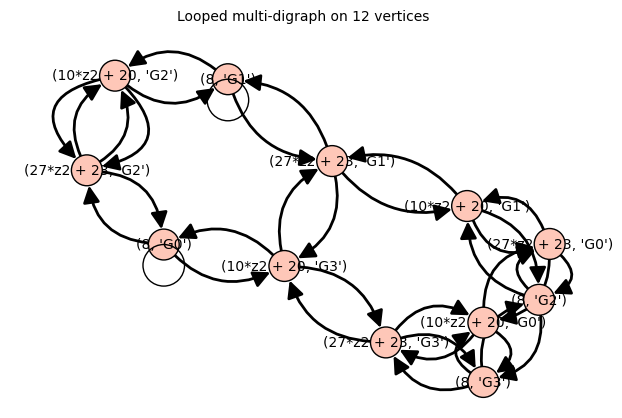

In [2]:
LS_Graph(37,2,3)